In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
from matplotlib import ticker
import os
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
mpl.rcParams['axes.unicode_minus']=False

### Part 1 波动率计算

In [2]:
rolling_window = 60

#### 中信数据

In [3]:
raw_data = pd.read_csv('./input/中信一级行业涨跌幅序列.CSV', encoding='gbk', usecols=range(4))
raw_data['Log_60D_VOL'] = raw_data.groupby('代码')['涨跌幅(%)'].rolling(rolling_window).std().apply(np.log).values
raw_data = raw_data.dropna().reset_index(drop = True)
raw_data

,代码,简称,日期,涨跌幅(%),Log_60D_VOL
0,CI005001.WI,石油石化(中信),2010-04-02,0.6098,0.232032
1,CI005001.WI,石油石化(中信),2010-04-06,0.2260,0.230409
2,CI005001.WI,石油石化(中信),2010-04-07,-0.0767,0.215607
3,CI005001.WI,石油石化(中信),2010-04-08,-0.9072,0.215928
4,CI005001.WI,石油石化(中信),2010-04-09,0.5898,0.201236
...,...,...,...,...,...
96484,CI005030.WI,综合金融(中信),2023-09-11,1.4401,0.403235
96485,CI005030.WI,综合金融(中信),2023-09-12,-0.8401,0.399658
96486,CI005030.WI,综合金融(中信),2023-09-13,0.1187,0.398281
96487,CI005030.WI,综合金融(中信),2023-09-14,-0.5073,0.393398


#### WIND 全A数据

In [4]:
WindA = pd.read_csv('./input/Wind全A涨跌幅序列.CSV', encoding= 'gbk', usecols= range(4))
WindA['Log_60D_VOL'] = WindA.rolling(rolling_window).std().apply(np.log).values
WindA = WindA.dropna().reset_index(drop = True)
WindA

,代码,简称,日期,涨跌幅(%),Log_60D_VOL
0,881001.WI,万得全A,2010-04-02,0.3107,0.214816
1,881001.WI,万得全A,2010-04-06,-0.0161,0.211867
2,881001.WI,万得全A,2010-04-07,-0.1960,0.208229
3,881001.WI,万得全A,2010-04-08,-0.7917,0.209211
4,881001.WI,万得全A,2010-04-09,1.0184,0.190012
...,...,...,...,...,...
3268,881001.WI,万得全A,2023-09-11,0.9257,-0.075774
3269,881001.WI,万得全A,2023-09-12,-0.1285,-0.085280
3270,881001.WI,万得全A,2023-09-13,-0.9065,-0.078759
3271,881001.WI,万得全A,2023-09-14,-0.3372,-0.078183


#### 两表合并

##### $L_1$ norm

In [15]:
data = pd.merge(raw_data[['代码', '简称', '日期', 'Log_60D_VOL']], WindA[['日期', 'Log_60D_VOL']], on = '日期')
data['adj_VOL'] = np.abs(data['Log_60D_VOL_x'] - data['Log_60D_VOL_y'])
data

,代码,简称,日期,Log_60D_VOL_x,Log_60D_VOL_y,adj_VOL
0,CI005001.WI,石油石化(中信),2010-04-02,0.232032,0.214816,0.017216
1,CI005002.WI,煤炭(中信),2010-04-02,0.751509,0.214816,0.536693
2,CI005003.WI,有色金属(中信),2010-04-02,0.645277,0.214816,0.430461
3,CI005004.WI,电力及公用事业(中信),2010-04-02,0.148142,0.214816,0.066674
4,CI005005.WI,钢铁(中信),2010-04-02,0.385318,0.214816,0.170502
...,...,...,...,...,...,...
96484,CI005026.WI,通信(中信),2023-09-15,0.639004,-0.105781,0.744784
96485,CI005027.WI,计算机(中信),2023-09-15,0.648167,-0.105781,0.753947
96486,CI005028.WI,传媒(中信),2023-09-15,0.664101,-0.105781,0.769881
96487,CI005029.WI,综合(中信),2023-09-15,-0.086682,-0.105781,0.019099


##### $L_2$ norm

In [6]:
data = pd.merge(raw_data[['代码', '简称', '日期', 'Log_60D_VOL']], WindA[['日期', 'Log_60D_VOL']], on = '日期')
data['adj_VOL'] = (data['Log_60D_VOL_x'] - data['Log_60D_VOL_y']) ** 2
data

,代码,简称,日期,Log_60D_VOL_x,Log_60D_VOL_y,adj_VOL
0,CI005001.WI,石油石化(中信),2010-04-02,0.232032,0.214816,0.000296
1,CI005002.WI,煤炭(中信),2010-04-02,0.751509,0.214816,0.288039
2,CI005003.WI,有色金属(中信),2010-04-02,0.645277,0.214816,0.185296
3,CI005004.WI,电力及公用事业(中信),2010-04-02,0.148142,0.214816,0.004445
4,CI005005.WI,钢铁(中信),2010-04-02,0.385318,0.214816,0.029071
...,...,...,...,...,...,...
96484,CI005026.WI,通信(中信),2023-09-15,0.639004,-0.105781,0.554704
96485,CI005027.WI,计算机(中信),2023-09-15,0.648167,-0.105781,0.568437
96486,CI005028.WI,传媒(中信),2023-09-15,0.664101,-0.105781,0.592717
96487,CI005029.WI,综合(中信),2023-09-15,-0.086682,-0.105781,0.000365


### Part 2 波动率的形态

#### 加总波动率不做平滑

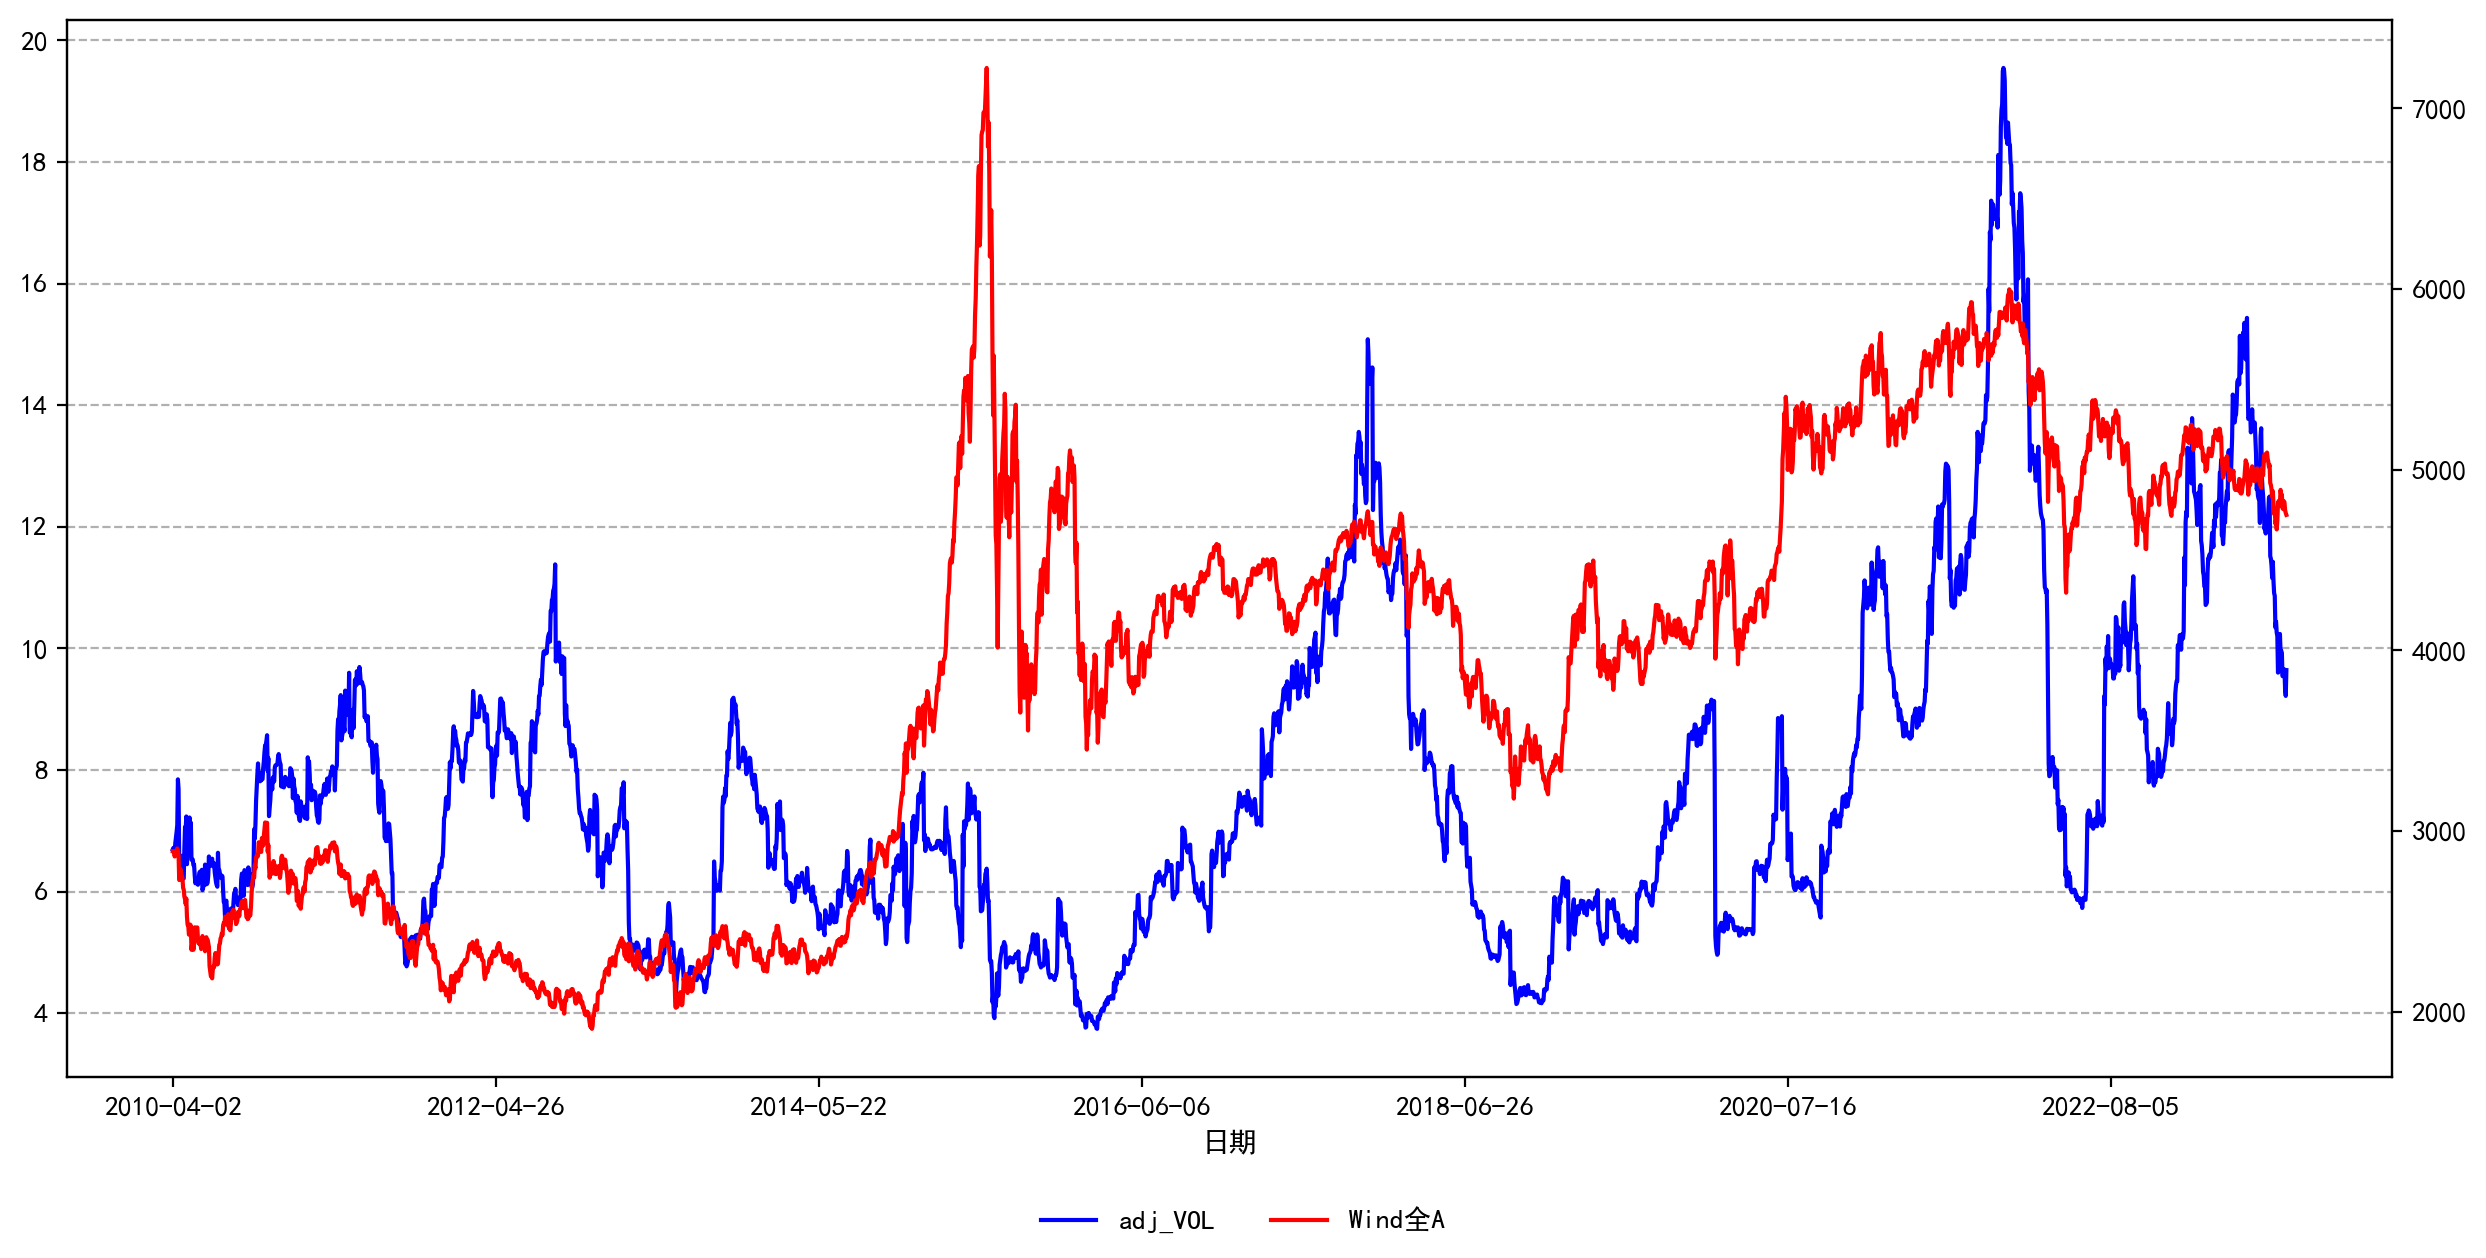

In [16]:
WindA_index = pd.read_csv('./input/Wind全A收盘价序列.CSV', encoding= 'gbk', usecols= range(4))
vol_index = data.groupby('日期')['adj_VOL'].sum()
res = pd.merge(WindA_index, vol_index, on = '日期')
res = res.set_index('日期')

fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
res['adj_VOL'].plot(ax = ax, color = 'blue', label = 'adj_VOL')
ax1 = ax.twinx() 
res['收盘价'].plot(ax = ax1, label = 'Wind全A', color = 'red')
ax.grid(axis = 'y', linestyle='--')
fig.legend(loc='lower center', ncol=2, frameon=False)

#### 加总波动率做MA(120)

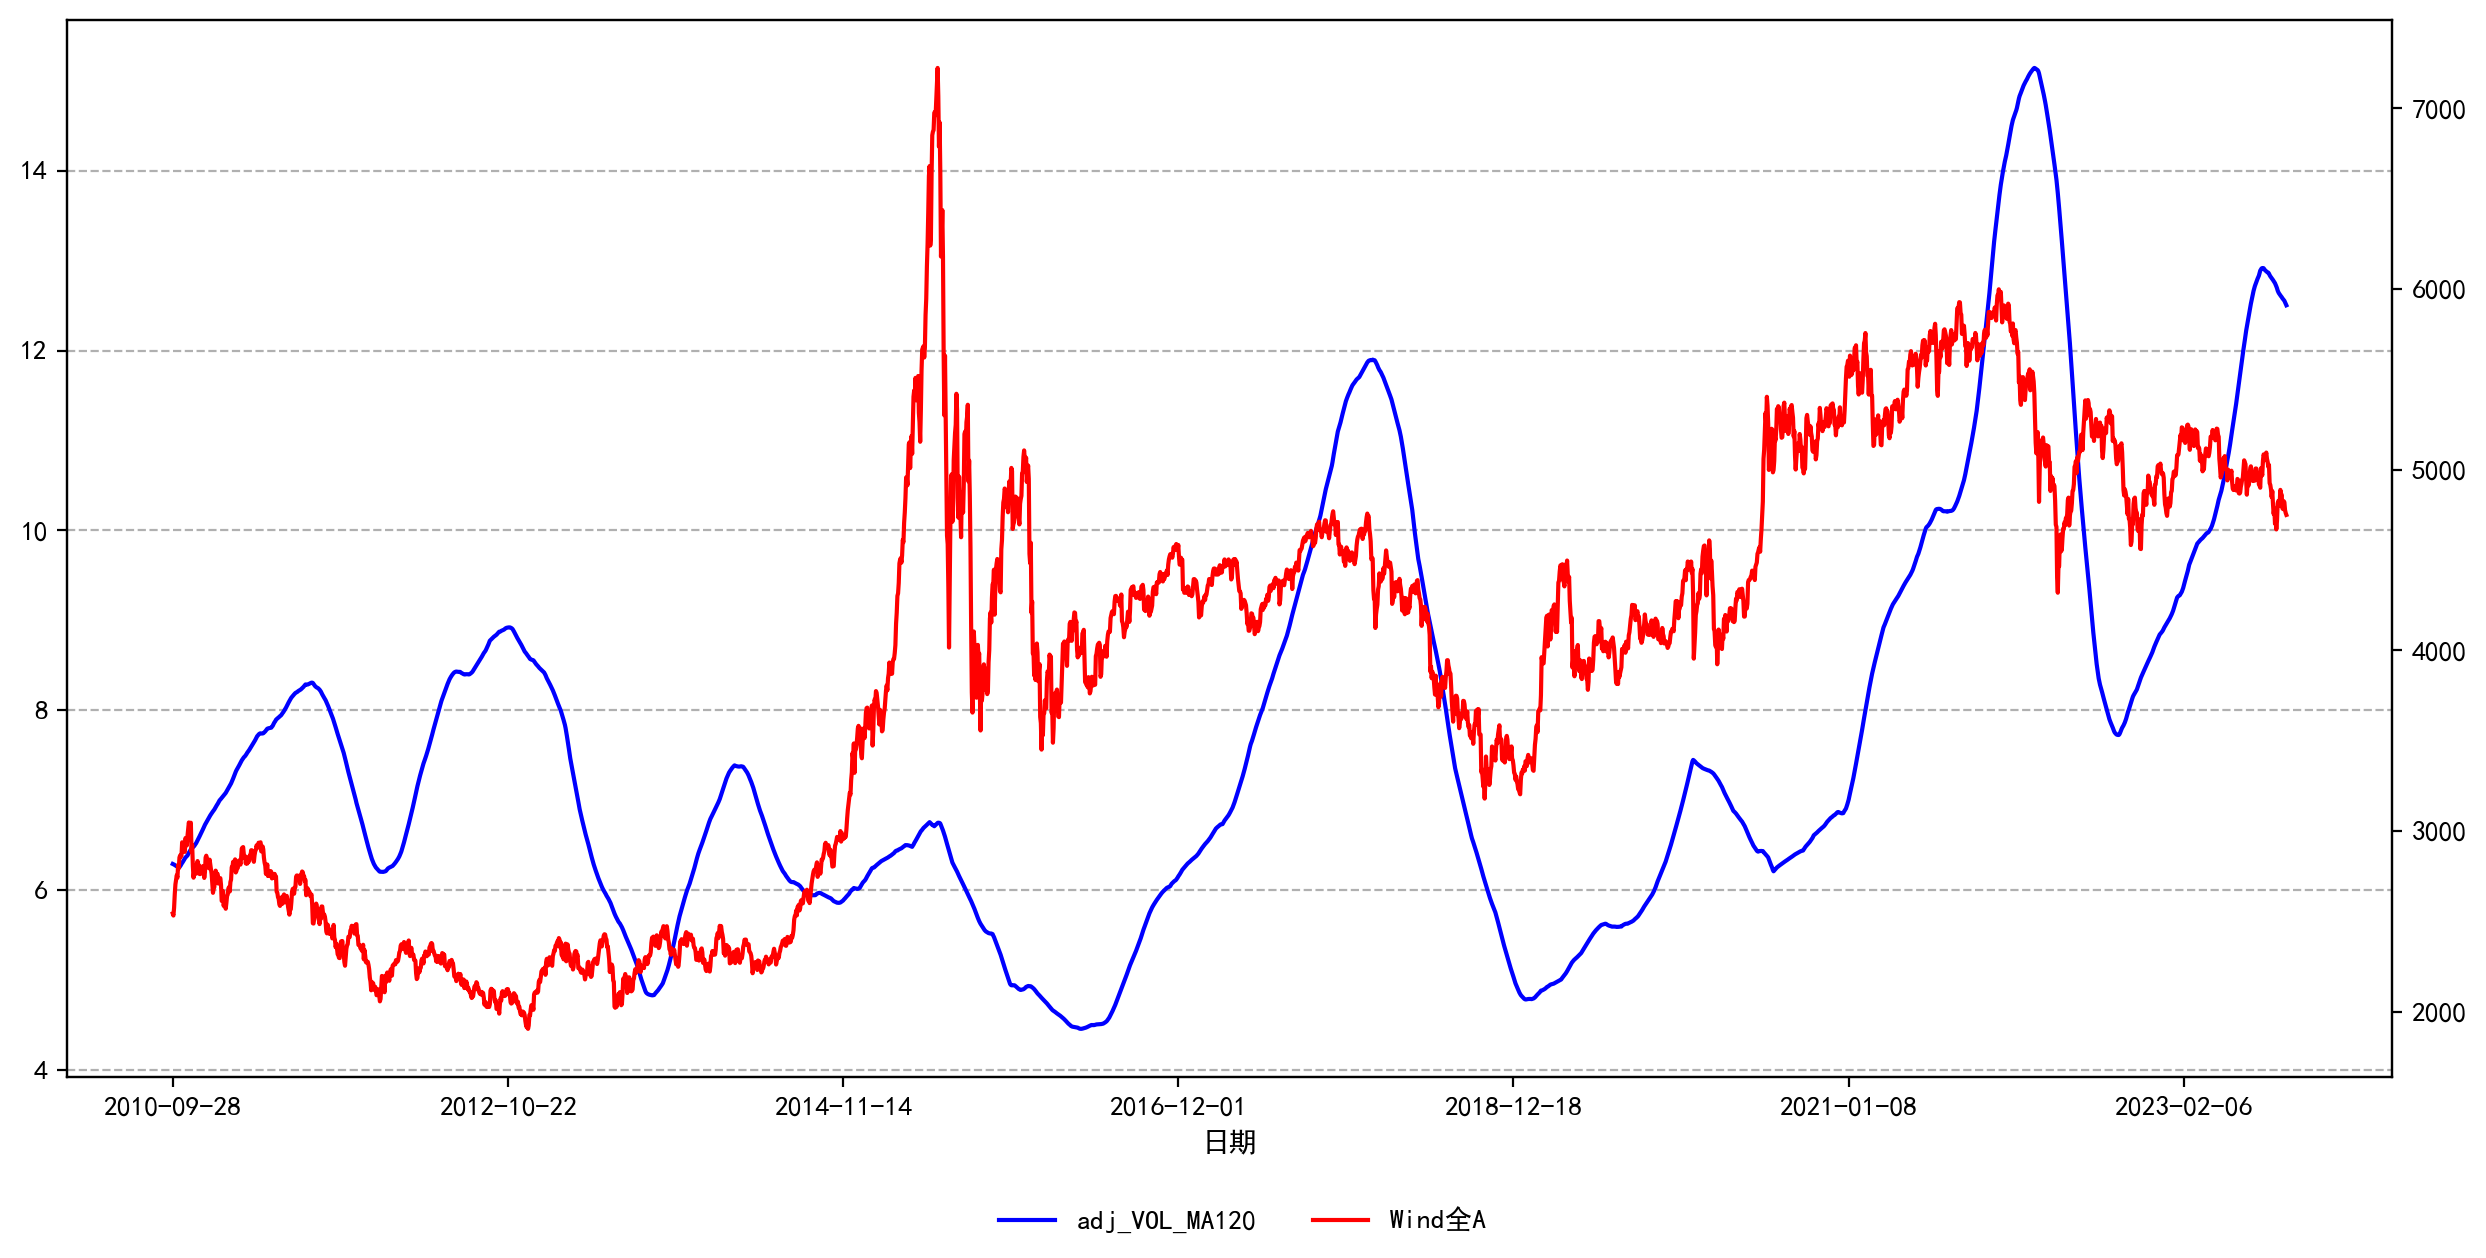

In [17]:
ma = 120

WindA_index = pd.read_csv('./input/Wind全A收盘价序列.CSV', encoding= 'gbk', usecols= range(4))
vol_index = data.groupby('日期')['adj_VOL'].sum().rolling(ma).mean().dropna()
res = pd.merge(WindA_index, vol_index, on = '日期')
res = res.set_index('日期')

fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
res['adj_VOL'].plot(ax = ax, color = 'blue', label = 'adj_VOL_MA' + str(ma))
ax1 = ax.twinx() 
res['收盘价'].plot(ax = ax1, label = 'Wind全A', color = 'red')
ax.grid(axis = 'y', linestyle='--')
fig.legend(loc='lower center', ncol=2, frameon=False)

### Part 3 波动率的处理过程

#### 原始数据及其MA

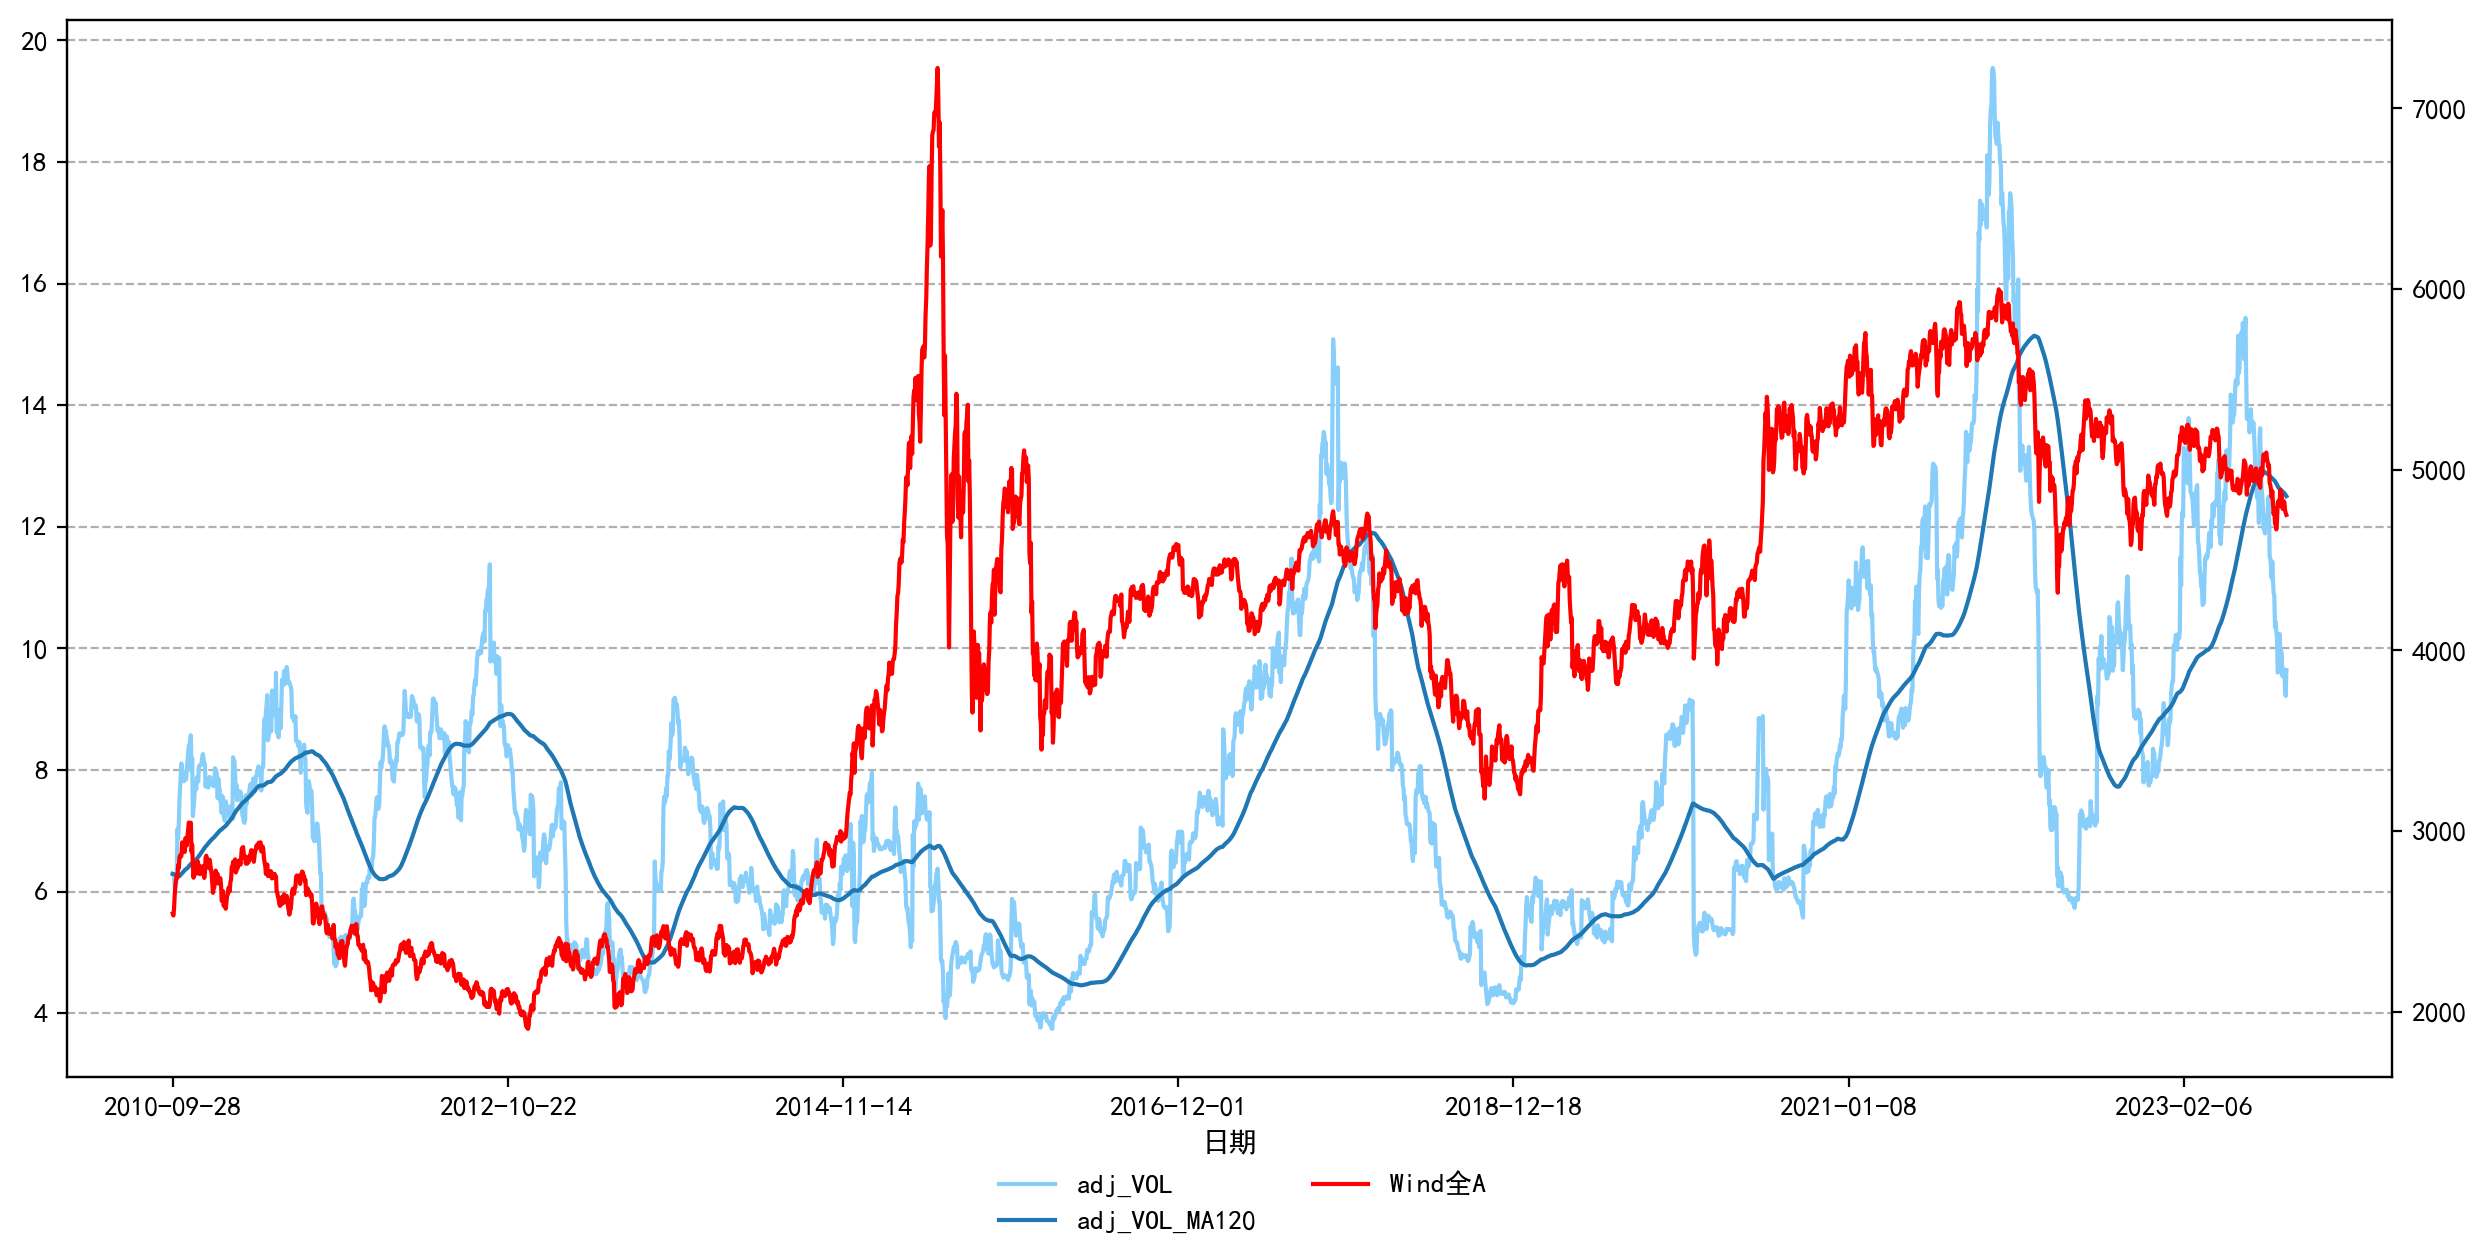

In [32]:
ma = 120

vol_index1 = data.groupby('日期')[['adj_VOL']].sum()
vol_index2 = data.groupby('日期')[['adj_VOL']].sum().rolling(ma).mean().dropna()
res = pd.merge(vol_index1, vol_index2, on = '日期')

fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
res['adj_VOL_x'].plot(ax = ax, color = 'lightskyblue', label = 'adj_VOL')
# ax1 = ax.twinx() 
res['adj_VOL_y'].plot(ax = ax, label = 'adj_VOL_MA' + str(ma))
ax1 = ax.twinx() 
WindA_index = pd.read_csv('./input/Wind全A收盘价序列.CSV', encoding= 'gbk', usecols= range(4))
vol_index = data.groupby('日期')['adj_VOL'].sum().rolling(ma).mean().dropna()
res = pd.merge(WindA_index, vol_index, on = '日期')
res = res.set_index('日期')
res['收盘价'].plot(ax = ax1, label = 'Wind全A', color = 'red')
ax.grid(axis = 'y', linestyle='--')
fig.legend(loc='lower center', ncol=5, frameon=False)

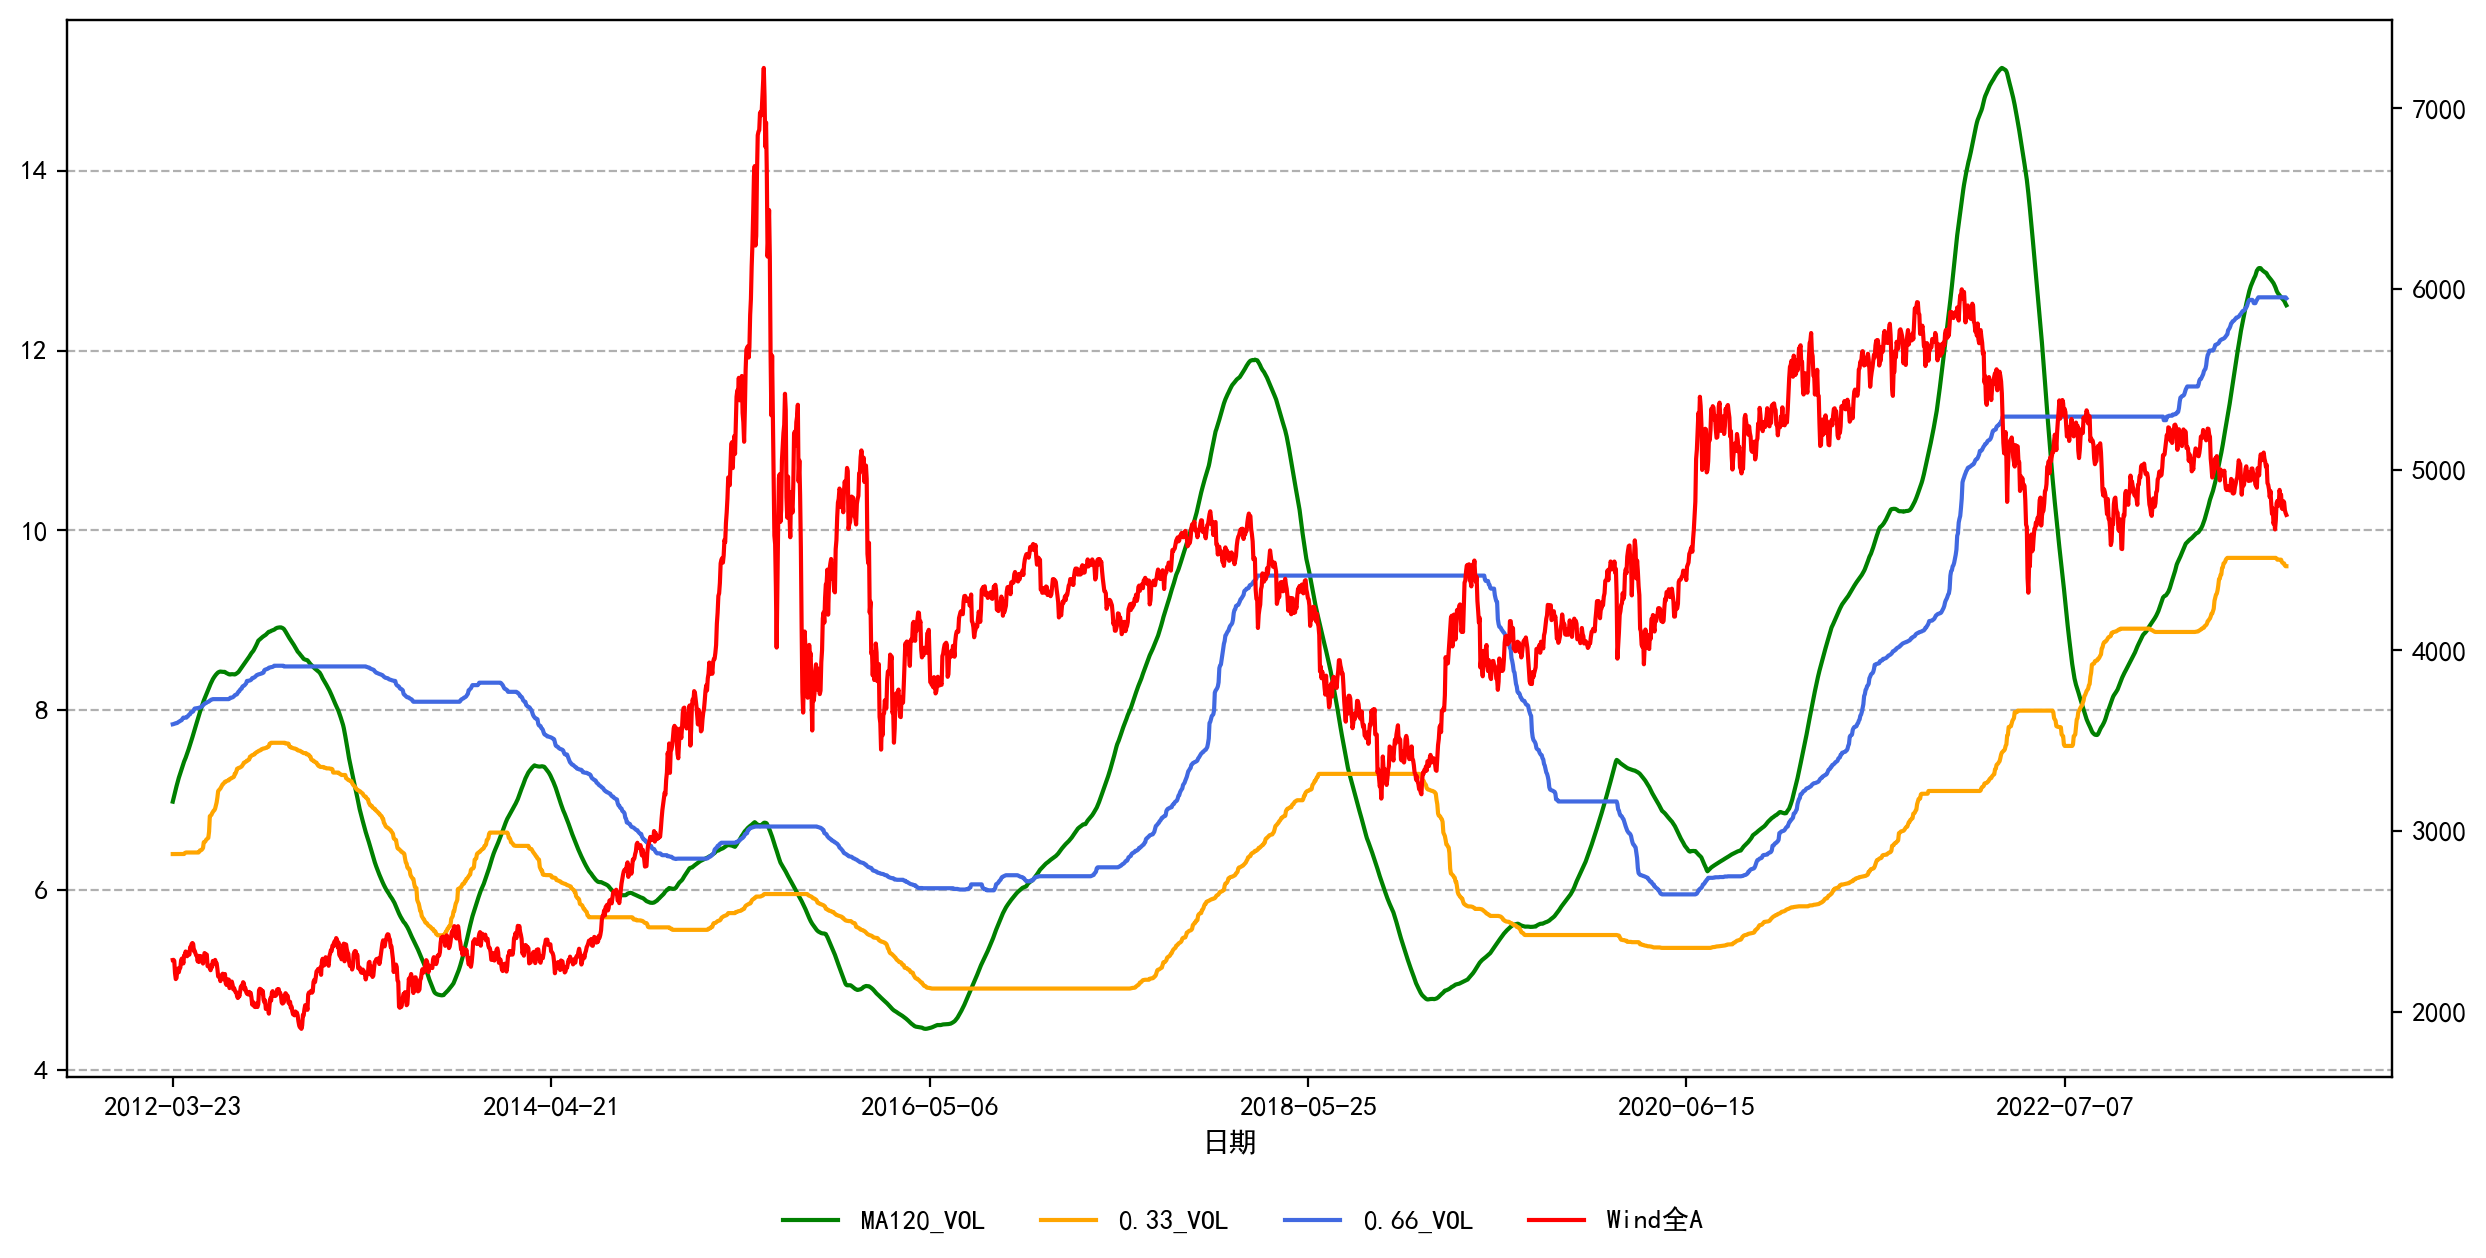

In [25]:
ma = 120

WindA_index = pd.read_csv('./input/Wind全A收盘价序列.CSV', encoding= 'gbk', usecols= range(4))
vol_index = data.groupby('日期')[['adj_VOL']].sum()
vol_index['adj_VOL_MA' + str(ma)] = data.groupby('日期')['adj_VOL'].sum().rolling(ma).mean()
vol_index['0.33_VOL'] = vol_index['adj_VOL'].rolling(480).quantile(0.33)
vol_index['0.66_VOL'] = vol_index['adj_VOL'].rolling(480).quantile(0.66)

res = pd.merge(WindA_index, vol_index.dropna(), on = '日期')
res = res.set_index('日期')

fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
res[res.columns[4:]].plot(ax = ax, legend=None, color = ['green', 'orange', 'royalblue'])
ax1 = ax.twinx() 
res['收盘价'].plot(ax = ax1, label = 'Wind全A', color = 'red')
ax.grid(axis = 'y', linestyle='--')
fig.legend(loc='lower center', ncol=5, frameon=False)

#### 尝试一下去除趋势

##### Way 1

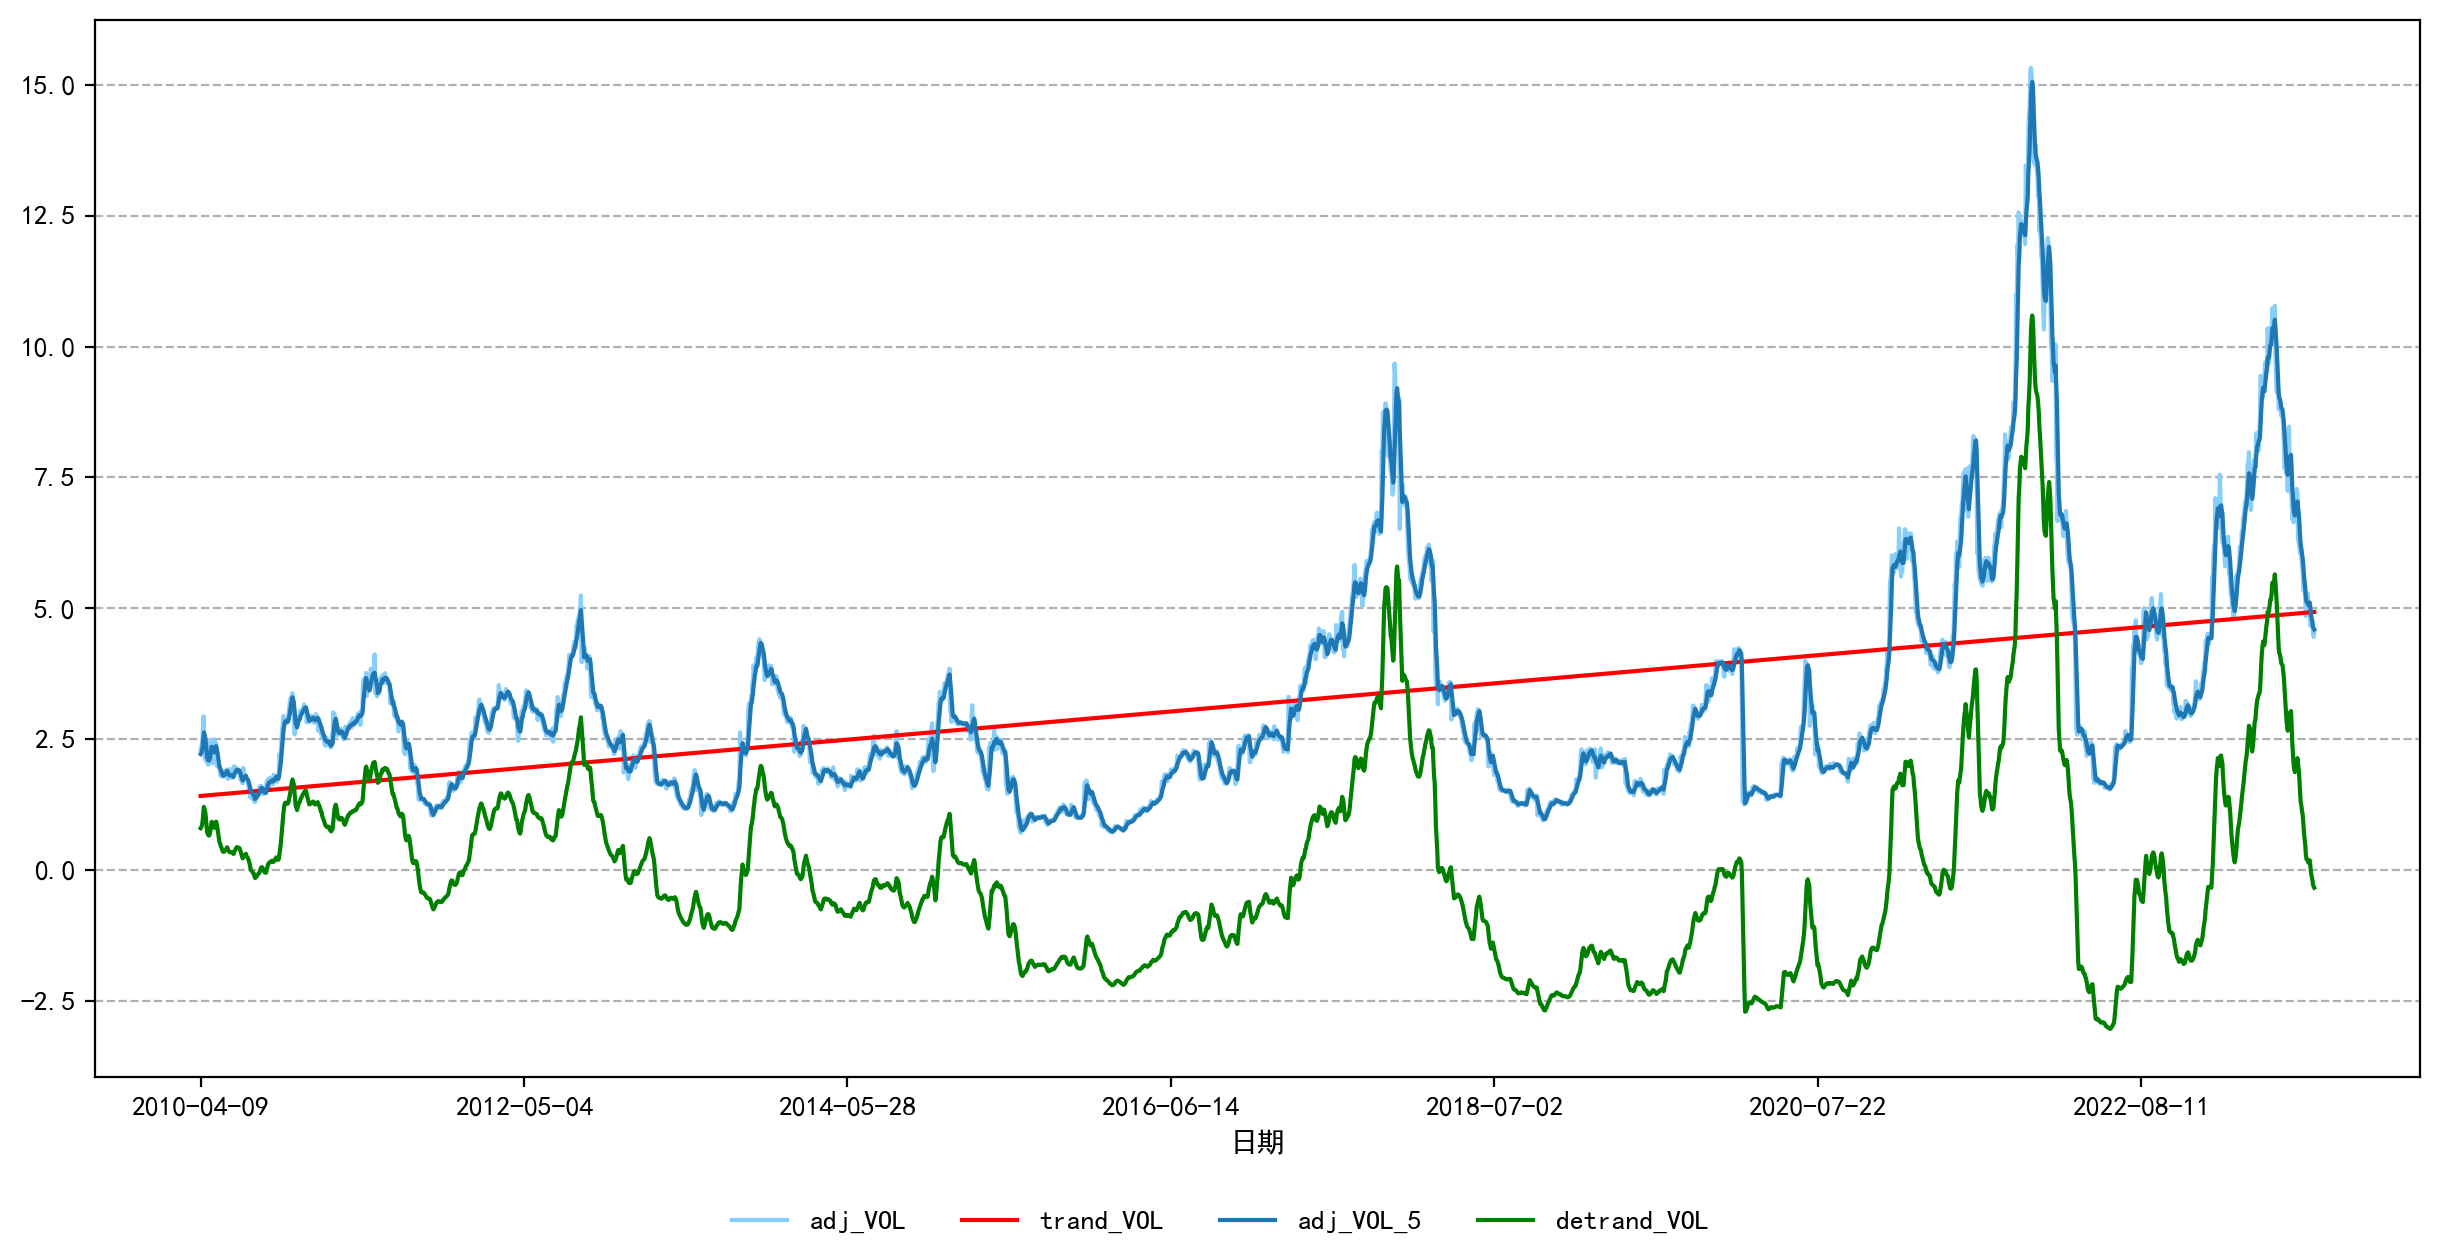

In [11]:
c = np.array([[1]] * len(res))
x = np.arange(0, len(res)).reshape(len(res), 1)
X = np.concatenate([c, x], axis = 1)
# res['detrand_VOL'] = res['adj_VOL_y'] - X@(np.linalg.inv((X.T)@X)@(X.T)@res['adj_VOL_y'])

res['detrand_VOL'] = res['adj_VOL_y'] - X@(np.linalg.pinv(X)@res['adj_VOL_y'])
fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
res['adj_VOL_x'].plot(ax = ax, color = 'lightskyblue', label = 'adj_VOL')
# pd.Series(X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T).dot(res['adj_VOL_y'])), index = res.index).plot(ax = ax, color = 'red', label = 'trand_VOL')
(res['adj_VOL_y'] - res['detrand_VOL']).plot(ax = ax, color = 'red', label = 'trand_VOL')
# ax1 = ax.twinx() 
res['adj_VOL_y'].plot(ax = ax, label = 'adj_VOL_' + str(ma))
res['detrand_VOL'].plot(ax = ax, label = 'detrand_VOL', color = 'green')
ax.grid(axis = 'y', linestyle='--')
fig.legend(loc='lower center', ncol=5, frameon=False)

##### Way 2

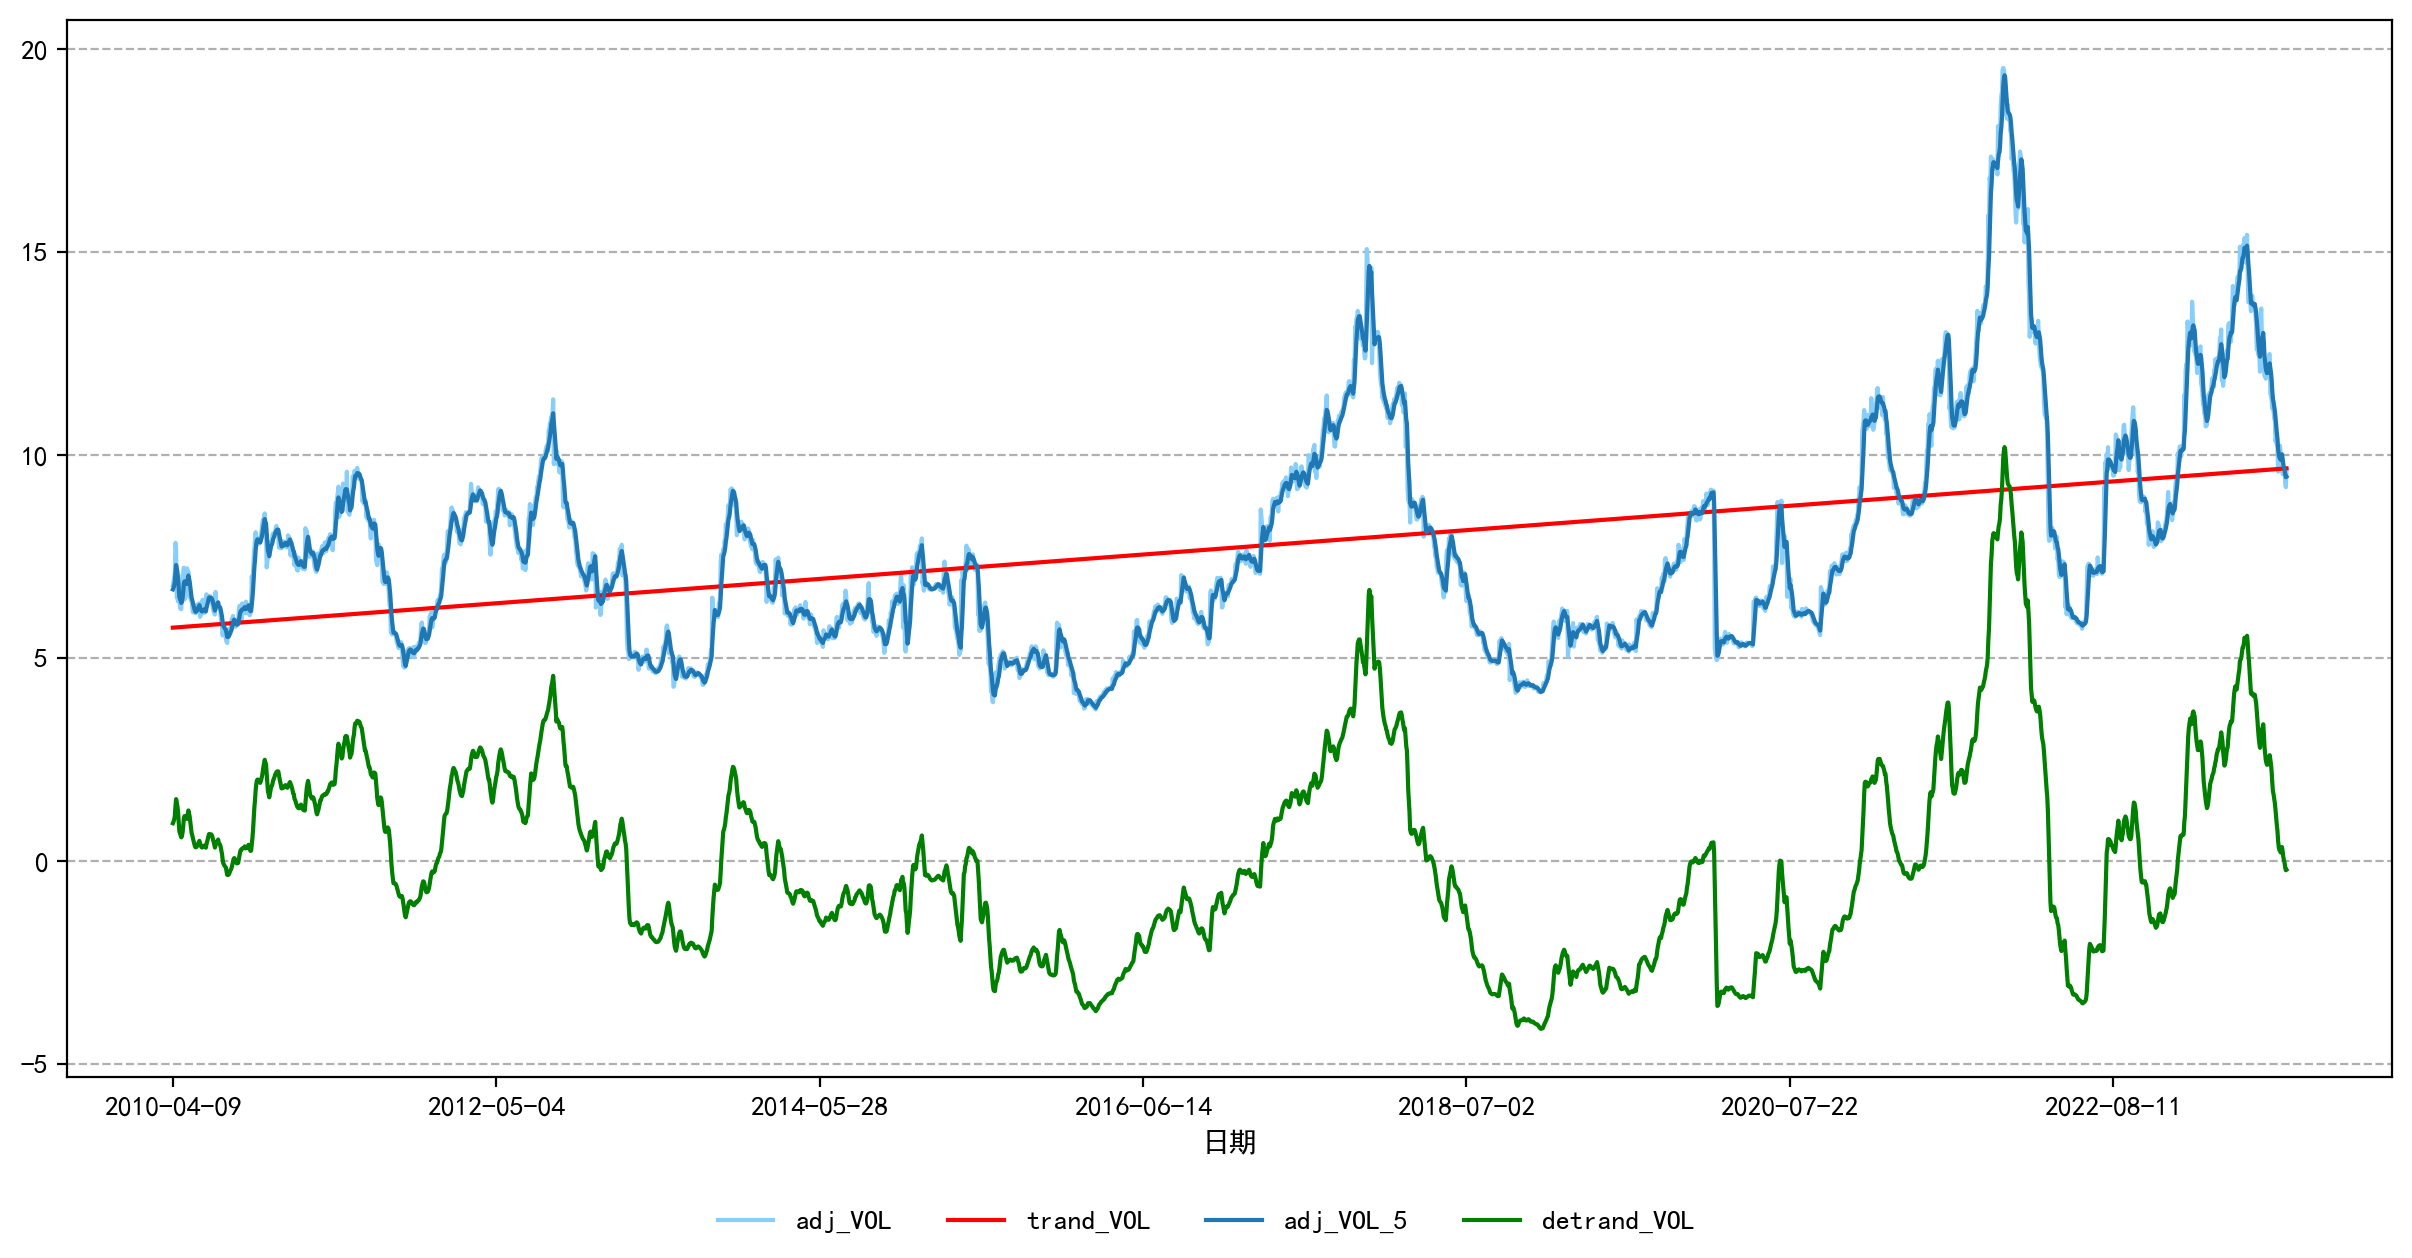

In [26]:
vol_index1 = data.groupby('日期')[['adj_VOL']].sum()
vol_index2 = data.groupby('日期')[['adj_VOL']].sum().rolling(ma).mean().dropna()
res = pd.merge(vol_index1, vol_index2, on = '日期')
res['detrand_VOL'] = signal.detrend(res['adj_VOL_y'], axis=-1, type='linear', bp=0, overwrite_data=False)
fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
res['adj_VOL_x'].plot(ax = ax, color = 'lightskyblue', label = 'adj_VOL')
# ax1 = ax.twinx() 
(res['adj_VOL_y'] - res['detrand_VOL']).plot(ax = ax, color = 'red', label = 'trand_VOL')

res['adj_VOL_y'].plot(ax = ax, label = 'adj_VOL_' + str(ma))
res['detrand_VOL'].plot(ax = ax, label = 'detrand_VOL', color = 'green')
ax.grid(axis = 'y', linestyle='--')
fig.legend(loc='lower center', ncol=5, frameon=False)

#### 上行判断与下行判断

In [27]:
WindA_index = pd.read_csv('./input/Wind全A收盘价序列.CSV', encoding= 'gbk', usecols= range(4))
res['0.33_VOL'] = res['detrand_VOL'].rolling(480).quantile(0.33)
res['0.66_VOL'] = res['detrand_VOL'].rolling(480).quantile(0.66)
res = pd.merge(WindA_index, res.dropna(), on = '日期')
res = res.set_index('日期')
res

,代码,简称,收盘价,adj_VOL_x,adj_VOL_y,detrand_VOL,0.33_VOL,0.66_VOL
日期,,,,,,,,
2012-03-29,881001.WI,万得全A,2180.4851,8.804063,8.999496,2.665410,0.491165,1.837145
2012-03-30,881001.WI,万得全A,2186.8015,8.796173,8.943661,2.608375,0.491165,1.838579
2012-04-05,881001.WI,万得全A,2232.1934,8.879381,8.914429,2.577942,0.491165,1.840661
2012-04-06,881001.WI,万得全A,2239.5540,8.917320,8.883860,2.546174,0.491165,1.848573
2012-04-09,881001.WI,万得全A,2218.4792,8.827462,8.844880,2.505993,0.491165,1.852620
...,...,...,...,...,...,...,...,...
2023-09-11,881001.WI,万得全A,4826.4111,9.539526,9.709871,0.032675,0.274304,3.171698
2023-09-12,881001.WI,万得全A,4820.2075,9.654967,9.648416,-0.029981,0.272736,3.171698
2023-09-13,881001.WI,万得全A,4776.5146,9.332598,9.529526,-0.150072,0.263035,3.171698


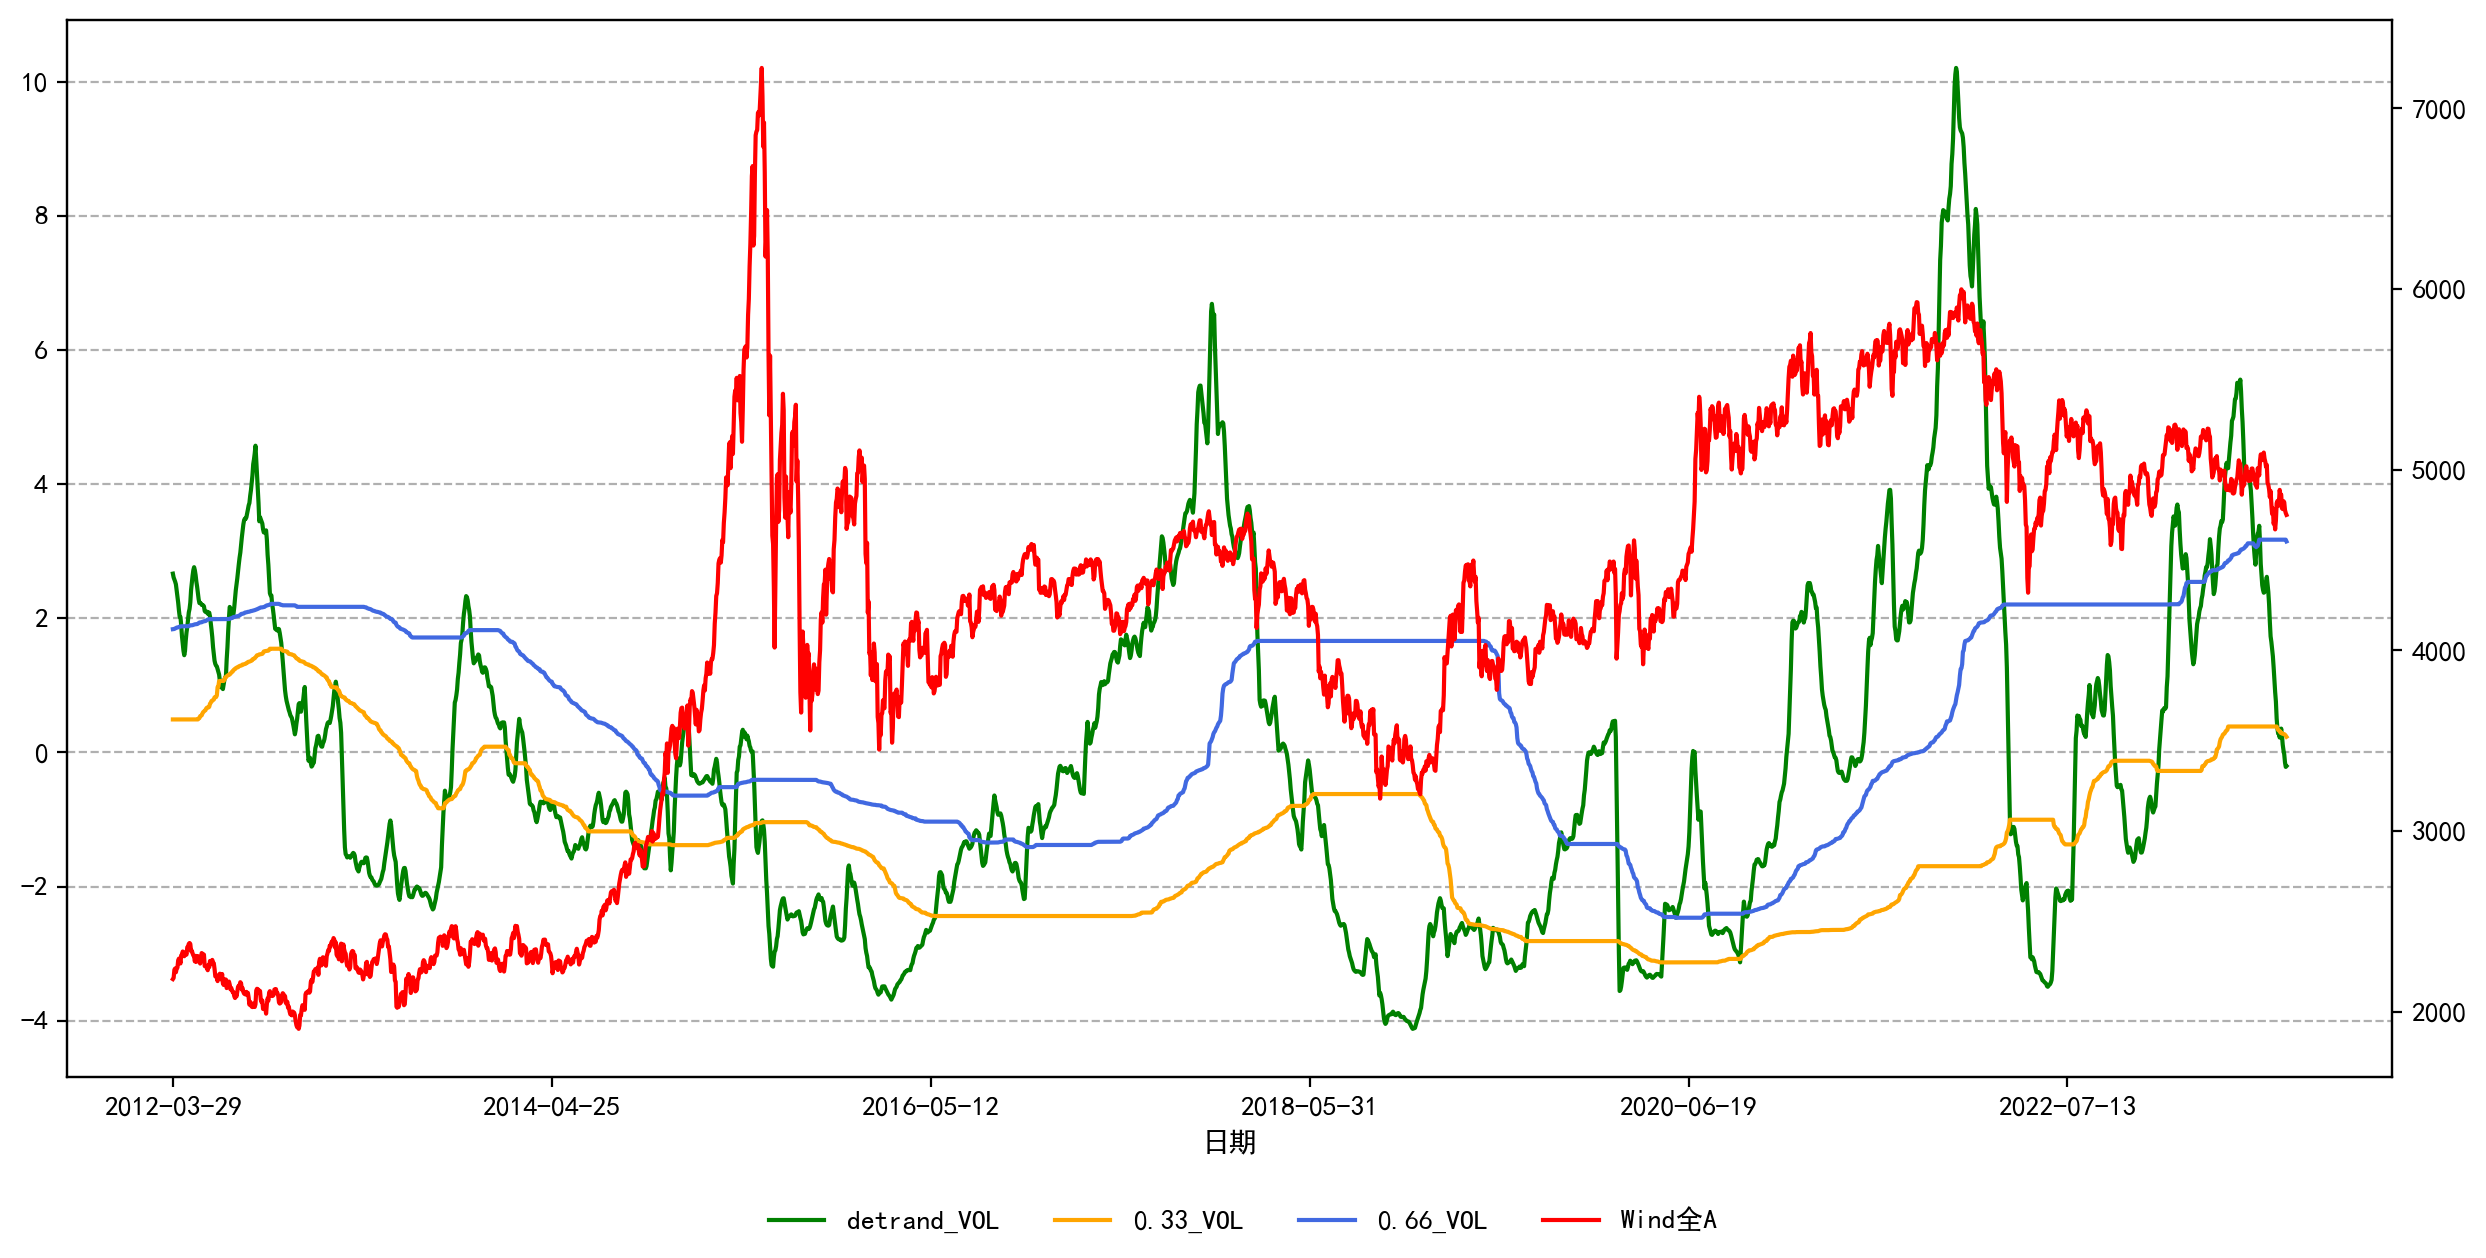

In [28]:
fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
res[res.columns[5:]].plot(ax = ax, legend=None, color = ['green', 'orange', 'royalblue'])
ax1 = ax.twinx() 
res['收盘价'].plot(ax = ax1, label = 'Wind全A', color = 'red')
ax.grid(axis = 'y', linestyle='--')
fig.legend(loc='lower center', ncol=5, frameon=False)